In [19]:

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.vector import *
N = ReferenceFrame('N')
f_1 =[[],[], []]
f_2 = [[],[], []]

# todo add d axis
t, r, a, l, rc, w, m, m2, mc, m3 = sy.symbols('t r a l rc w m m2 mc m3')

phi = 120
base_v = {mc:0,
          m3:m,
          m:3,
          r:0.05,
          l:0.2,
          w:2000*np.pi/30,
          a: 1/3}
deg = (-phi, -90)

axis_t = [[N.x, N.y],
          [sy.cos(-phi)*N.x+sy.sin(-phi)*N.y, sy.cos(-phi)*N.y-sy.sin(-phi)*N.x],
          [sy.cos(phi)*N.x+sy.sin(phi)*N.y, sy.cos(phi)*N.y-sy.sin(phi)*N.x]]
r3 = a*l
r4 = r-r3
A = w**2 * (r *( m3 + m)-mc*rc)
B = w**2 * (r3 /l*m3 + m)*r**2/l
#C = (r4 /l*m3*r-mc*rc)*w**2
C=0

In [20]:
for i in range(3):
    th = t*w + np.deg2rad(120*i)
    # if i==1:
    #     a1 = A.subs(m,2*m)
    #     b1 = B.subs(m,2*m)
    # else:
    a1=A
    b1=B
    f1 = a1*sy.cos(th)+b1*sy.cos(2*th)
    f2 = a1 * sy.sin(th)
    f_1[i].append(f1)
    f_2[i].append(f2)

    # print(f2)
F1 = 0
F2 = 0
for i in range(3):
    F1 += sum(f_1[i])*axis_t[i][0]
    F2 = sum(f_2[i])*axis_t[i][1]


# print(F2)
for i,j in base_v.items():
    F1 = F1.subs(i,j)
    F2 = F2.subs(i,j)

Fs = F1 + F2
Fs

((13159.4725347858*cos(209.43951023932*t + 2.0943951023932) + 2193.2454224643*cos(418.879020478639*t + 4.18879020478639))*cos(120) + (13159.4725347858*cos(209.43951023932*t + 4.18879020478639) + 2193.2454224643*cos(418.879020478639*t + 8.37758040957278))*cos(120) - 13159.4725347858*sin(120)*sin(209.43951023932*t + 4.18879020478639) + 13159.4725347858*cos(209.43951023932*t) + 2193.2454224643*cos(418.879020478639*t))*N.x + (-(13159.4725347858*cos(209.43951023932*t + 2.0943951023932) + 2193.2454224643*cos(418.879020478639*t + 4.18879020478639))*sin(120) + (13159.4725347858*cos(209.43951023932*t + 4.18879020478639) + 2193.2454224643*cos(418.879020478639*t + 8.37758040957278))*sin(120) + 13159.4725347858*sin(209.43951023932*t + 4.18879020478639)*cos(120))*N.y

Matrix([[-10770.6658884013 - 9005.81857280082*sin(120) + 10770.6658884013*cos(120)], [8697.31416506017*sin(120) + 9005.81857280082*cos(120)], [0]])


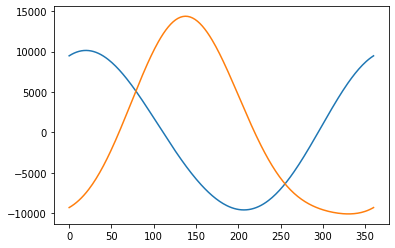

In [23]:
F_s = Fs.to_matrix(N)
f = sy.lambdify(t, F_s[0])
f2 = sy.lambdify(t,  F_s[1])
sp = np.linspace(0,2*np.pi/base_v[w], 250)
F_sx = f(sp)
F_sy = f2(sp)
print(sy.sympify(F_s.subs(t,np.pi/6)))
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.plot(np.rad2deg(sp*base_v[w]), F_sx)
plt.plot(np.rad2deg(sp*base_v[w]), F_sy)
plt.show()
# print(F2)